# Import Necessary Library

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
wine = pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Understanding

In [3]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

# Data Preparation

In [6]:
X = wine.drop('Type',axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(X_scaled)

In [38]:
X = pd.DataFrame(pca_transformed,columns= ['PCA1','PCA2','PCA3'])
X

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [26]:
variance = pca.explained_variance_ratio_

In [27]:
np.cumsum(np.round(variance,4)*100)

array([36.2 , 55.41, 66.53])

# Using Hierarchcal Clustering

In [39]:
pca_transformed_1 = X.copy()

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Distance')

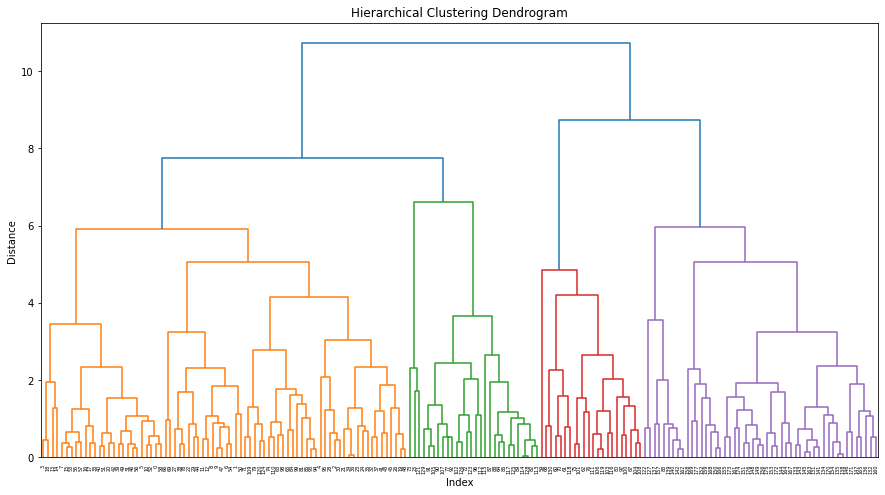

In [22]:
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(pca_transformed_1,method='complete', metric='euclidean'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

In [90]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [91]:
y_hc = hc.fit_predict(X_scaled)
y_hc_df = pd.DataFrame(y_hc)
y_hc_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
173,2
174,2
175,2
176,2


In [92]:
pca_transformed_1['clusters'] = y_hc_df
pca_transformed_1
 

,PCA1,PCA2,PCA3,clusters
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


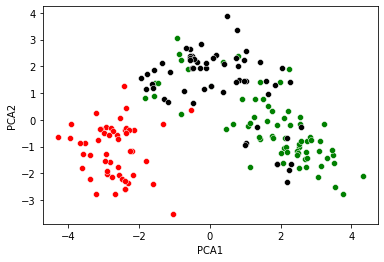

In [93]:
c1 = pca_transformed_1[pca_transformed_1['clusters'] ==0]
c2 = pca_transformed_1[pca_transformed_1['clusters'] ==1]
c3 = pca_transformed_1[pca_transformed_1['clusters'] ==2]
c4 = pca_transformed_1[pca_transformed_1['clusters'] ==3]

sns.scatterplot(c3.PCA1,c3.PCA2,color = 'red',)
sns.scatterplot(c1.PCA1,c1.PCA2,color = 'green')
sns.scatterplot(c2.PCA1,c2.PCA2,color = 'black')
sns.scatterplot(c4.PCA1,c4.PCA2,color = 'purple')
plt.show()

# Using Kmeans

In [66]:
pca_transformed_2 = X.copy()

In [67]:
pca_transformed_2

,PCA1,PCA2,PCA3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [48]:
from sklearn.cluster import KMeans

In [49]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_transformed_2)
    wcss.append(kmeans.inertia_)

In [50]:
wcss

[1539.503480188306,
 886.1611364823497,
 512.9995067661519,
 429.5747407332024,
 371.8666188326641,
 325.05798142040356,
 288.1869039391737,
 267.2396266641038,
 243.95894247812484,
 214.4535498476741]

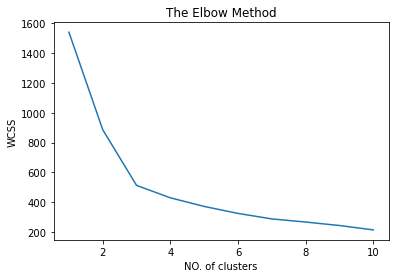

In [56]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('NO. of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(pca_transformed_2)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [72]:
pca_transformed_2['clusters'] = y_pred

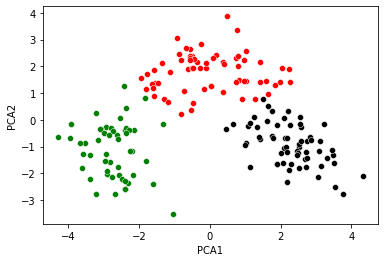

In [73]:
c1 = pca_transformed_2[pca_transformed_2['clusters'] ==0]
c2 = pca_transformed_2[pca_transformed_2['clusters'] ==1]
c3 = pca_transformed_2[pca_transformed_2['clusters'] ==2]
c4 = pca_transformed_2[pca_transformed_2['clusters'] ==3]

sns.scatterplot(c3.PCA1,c3.PCA2,color = 'red',)
sns.scatterplot(c1.PCA1,c1.PCA2,color = 'green')
sns.scatterplot(c2.PCA1,c2.PCA2,color = 'black')
sns.scatterplot(c4.PCA1,c4.PCA2,color = 'purple')
plt.show()

In [80]:
pca_transformed_2['Type'] = insert

In [81]:
insert = wine[['Type']]

In [79]:
pca_transformed_2

,PCA1,PCA2,PCA3,clusters,Type
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,1
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,1
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0,3
174,-2.601956,-1.757229,0.207581,0,3
175,-2.677839,-2.760899,-0.940942,0,3
176,-2.387017,-2.297347,-0.550696,0,3


# Infernece: 
* Kmeans is performing better 